In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv(r'..\resources\spotify\dataset.csv')

In [26]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Column Specifications

| Column             | Type              | Description |
|--------------------|-------------------|-------------|
| track_id          | String           | Unique Spotify ID for the track (e.g., "spotify:track:2takcwOaAZWiXQijPHIx7B"). |
| artists           | String           | Names of performing artists, separated by semicolons for multiples. |
| album_name        | String           | Name of the album containing the track. |
| track_name        | String           | Title of the track. |
| popularity        | Integer (0-100)  | Score where higher values indicate greater popularity based on plays and recency. |
| duration_ms       | Integer          | Track length in milliseconds. |
| explicit          | Boolean          | Indicates if the track contains explicit lyrics. |
| danceability      | Float (0.0-1.0)  | Suitability for dancing based on tempo, rhythm stability, beat strength, and regularity (0.0 least, 1.0 most). |
| energy            | Float (0.0-1.0)  | Perceived intensity and activity (0.0 calm, 1.0 high-energy). |
| key               | Integer (-1 to 11)| Numeric key (0=C, 1=C♯/D♭); -1 if no key detected. |
| loudness          | Float            | Overall loudness in decibels (typically -60 to 0). |
| mode              | Integer (0-1)    | Modality (0=major, 1=minor). |
| speechiness       | Float (0.0-1.0)  | Presence of spoken words (0.0=music, 1.0=spoken like podcast). |
| acousticness      | Float (0.0-1.0)  | Confidence that the track is acoustic (0.0=electric, 1.0=acoustic). |
| instrumentalness  | Float (0.0-1.0)  | Likelihood of no vocals (0.0=vocalic, 1.0=instrumental). |
| liveness          | Float (0.0-1.0)  | Detection of live audience (higher for live recordings). |
| valence           | Float (0.0-1.0)  | Musical positiveness (0.0=sad/angry, 1.0=happy/cheerful). |
| tempo             | Float            | Estimated beats per minute (BPM). |
| time_signature    | Integer          | An estimated overall time signature (e.g., 4/4 as 4). |
| track_genre       | String           | Assigned genre label (e.g., from datasets covering 125 genres). |

In [28]:
df_null = df[df['track_name'].isna()]
df_null

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [29]:
df = df.rename(columns={'Unnamed: 0': 'song_no'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [31]:
df = df.fillna('Unknown')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           114000 non-null  object 
 3   album_name        114000 non-null  object 
 4   track_name        114000 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [33]:
df['popularity'].nunique()

101

In [34]:
df['popularity'].value_counts(normalize=True).sort_values(ascending=False)

popularity
0      0.140526
22     0.020649
21     0.020561
44     0.020070
1      0.018772
         ...   
98     0.000061
94     0.000061
95     0.000044
100    0.000018
99     0.000009
Name: proportion, Length: 101, dtype: float64

In [35]:
df_numeric = df.select_dtypes(include="number")
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   popularity        114000 non-null  int64  
 2   duration_ms       114000 non-null  int64  
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.0 MB


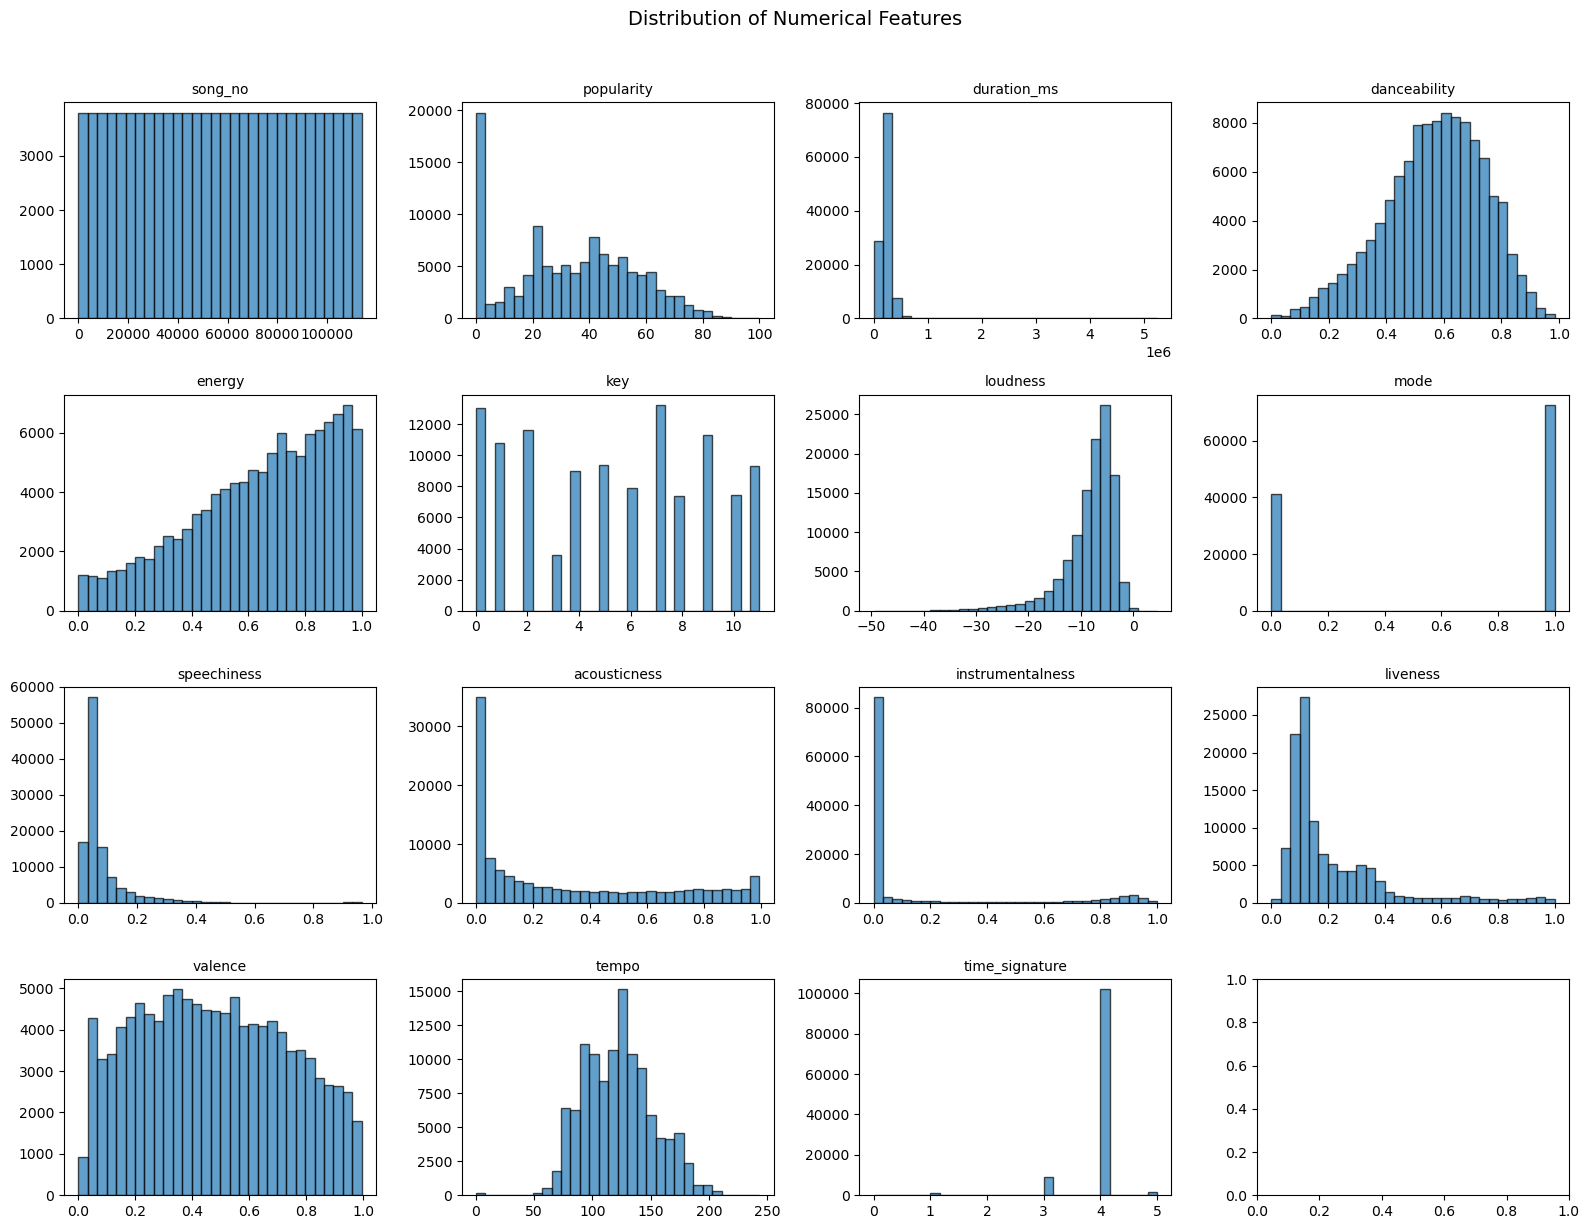

In [36]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(df_numeric.columns[:15]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [37]:
# Select only numeric columns
X_num = df.select_dtypes(include=np.number)

# Compute correlation matrix (default method='pearson')
corr_matrix = X_num.corr().round(2)

# Display the matrix
print(corr_matrix)

                  song_no  popularity  duration_ms  danceability  energy  \
song_no              1.00        0.03        -0.03          0.00   -0.06   
popularity           0.03        1.00        -0.01          0.04    0.00   
duration_ms         -0.03       -0.01         1.00         -0.07    0.06   
danceability         0.00        0.04        -0.07          1.00    0.13   
energy              -0.06        0.00         0.06          0.13    1.00   
key                 -0.01       -0.00         0.01          0.04    0.05   
loudness            -0.03        0.05        -0.00          0.26    0.76   
mode                 0.01       -0.01        -0.04         -0.07   -0.08   
speechiness         -0.08       -0.04        -0.06          0.11    0.14   
acousticness         0.08       -0.03        -0.10         -0.17   -0.73   
instrumentalness    -0.07       -0.10         0.12         -0.19   -0.18   
liveness             0.03       -0.01         0.01         -0.13    0.18   
valence     

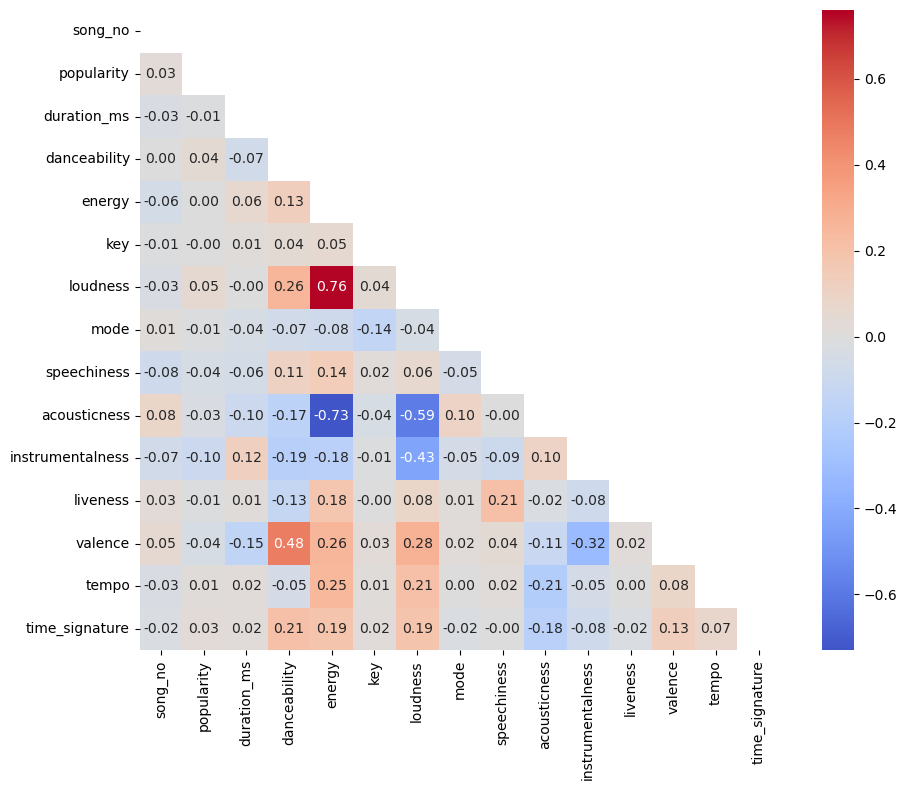

In [38]:
# Assuming corr_matrix from before
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,                          # Hides upper triangle
    cmap="coolwarm",                    # Red-blue diverging colormap
    center=0,                           # Centers white at 0 correlation
    square=True,                        # Square cells
    annot=True,                         # Show values
    fmt=".2f"                           # 2 decimal places
)
plt.tight_layout()
plt.show()

In [39]:
# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [40]:
X_reg = X_num.drop('energy', axis=1)
y_reg = X_num['energy']   

In [41]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [42]:
print(f"Training on {len(X_train_reg)} songs")
print(f"Testing on {len(X_test_reg)} songs")

Training on 91200 songs
Testing on 22800 songs


In [43]:
# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = reg_model.predict(X_test_reg)

In [44]:
y_pred_reg

array([0.72035572, 0.97465435, 0.48943332, ..., 0.50555155, 0.80005466,
       0.69575408])

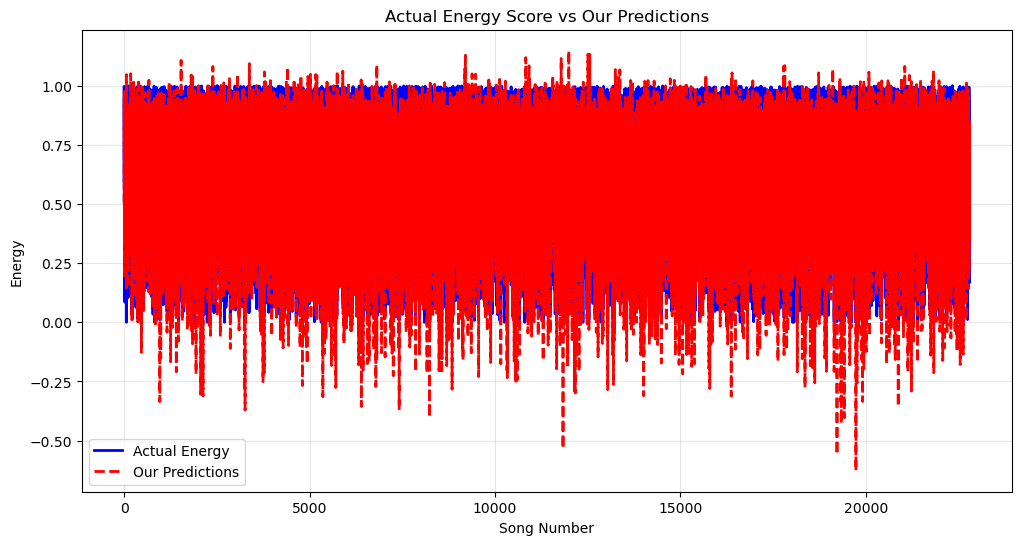

In [45]:
# Simple line plot - Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot both lines
x_axis = range(len(y_test_reg))
plt.plot(x_axis, y_test_reg.values, 'b-', label='Actual Energy', linewidth=2)
plt.plot(x_axis, y_pred_reg, 'r--', label='Our Predictions', linewidth=2)

plt.xlabel('Song Number')
plt.ylabel('Energy')
plt.title('Actual Energy Score vs Our Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
# Calculate metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("REGRESSION METRICS EXPLAINED:")
print("=" * 50)
print()
print("Mean Absolute Error (MAE)")
print(f"   Your MAE: Energy {mae:,.0f}")
print("   What it means: On average, our predictions are off by this much")
print("   Think of it as: The typical mistake we make")
print("   Goal: Lower is better!")
print()
print("R² Score (R-squared)")
print(f"   Your R²: {r2:.1%}")
print("   What it means: How much of the price variation we can explain")
print("   Think of it as: Our model's grade out of 100%")
print("   Goal: Higher is better (100% = perfect, 0% = terrible)")
print()
print("Quick Guide:")
print("   R² > 80% = Great!")
print("   R² 70-80% = Good")
print("   R² 60-70% = OK")
print("   R² < 60% = Needs improvement")

REGRESSION METRICS EXPLAINED:

Mean Absolute Error (MAE)
   Your MAE: Energy 0
   What it means: On average, our predictions are off by this much
   Think of it as: The typical mistake we make
   Goal: Lower is better!

R² Score (R-squared)
   Your R²: 76.5%
   What it means: How much of the price variation we can explain
   Think of it as: Our model's grade out of 100%
   Goal: Higher is better (100% = perfect, 0% = terrible)

Quick Guide:
   R² > 80% = Great!
   R² 70-80% = Good
   R² 60-70% = OK
   R² < 60% = Needs improvement
